In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
# data from sklearn
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
data=pd.DataFrame(mnist.data)
data=data/255. # normalizing

In [5]:
target=pd.Series(mnist.target,dtype='int')

In [6]:
def showimage(row_num):
    plt.figure()
    a=255*data.iloc[row_num,:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)

<IPython.core.display.Javascript object>


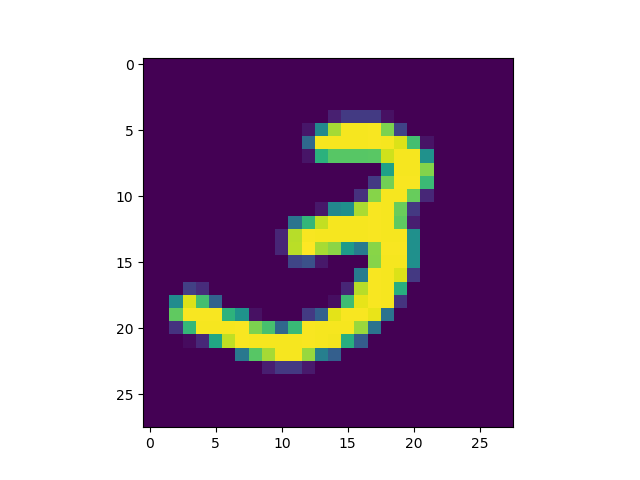

In [7]:
showimage(20102)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [9]:
X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=7,shuffle=True,test_size=1/7)

In [10]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

<IPython.core.display.Javascript object>


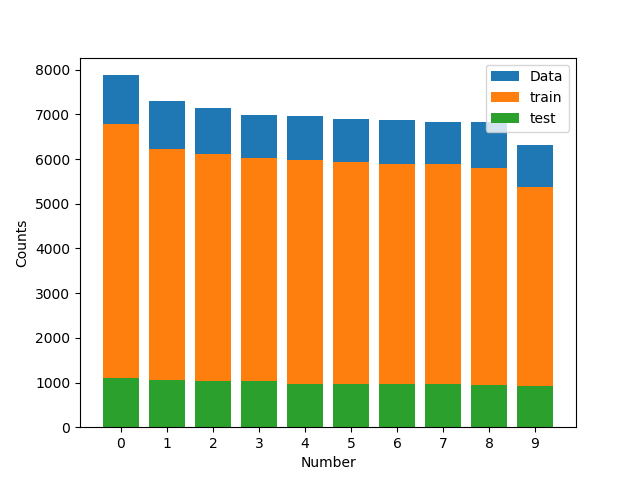

Text(0,0.5,'Counts')

In [11]:
plt.figure()
ind=[i for i in range(10)]
plt.bar(ind,target.value_counts(),label='Data')
plt.bar(ind,y_train.value_counts(),label='train')
plt.bar(ind,y_test.value_counts(),label='test')
plt.legend()
plt.xticks(ind,ind)
plt.xlabel('Number')
plt.ylabel('Counts')
#plt.yscale('log')

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


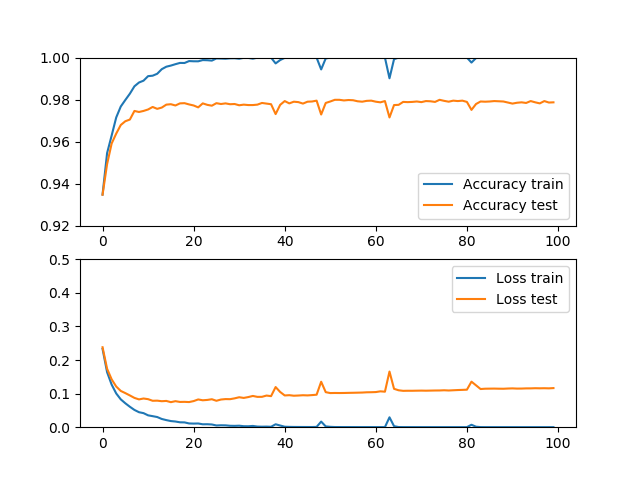

In [77]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()

In [79]:
max(accuracy_train),max(accuracy_test)

(1.0, 0.9799)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


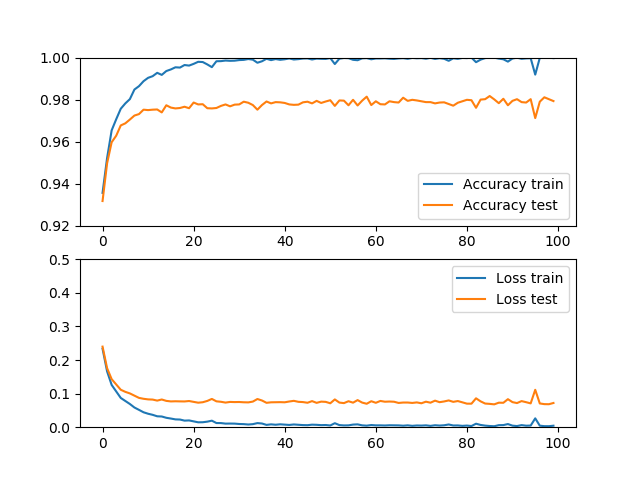

In [80]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1,alpha=0.01)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()

In [81]:
max(accuracy_train),max(accuracy_test)

(0.9999833333333333, 0.9817)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


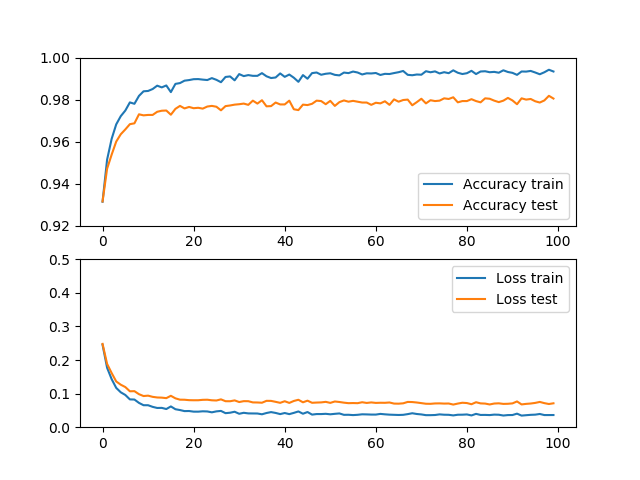

In [82]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1,alpha=0.1)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


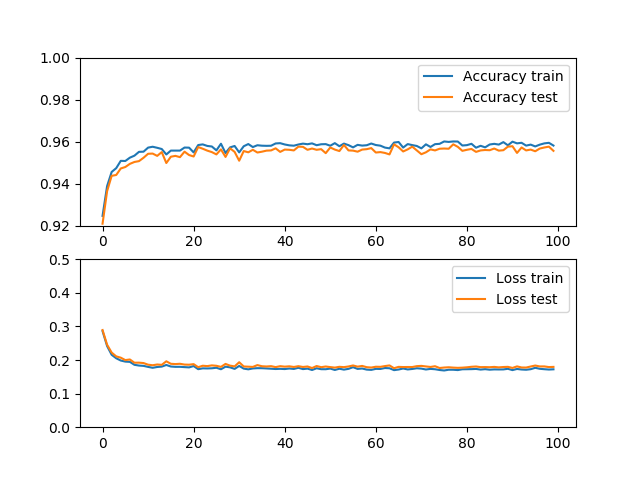

In [83]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1,alpha=1)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()

In [87]:
max(accuracy_train),max(accuracy_test)

(0.9600666666666666, 0.9587)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


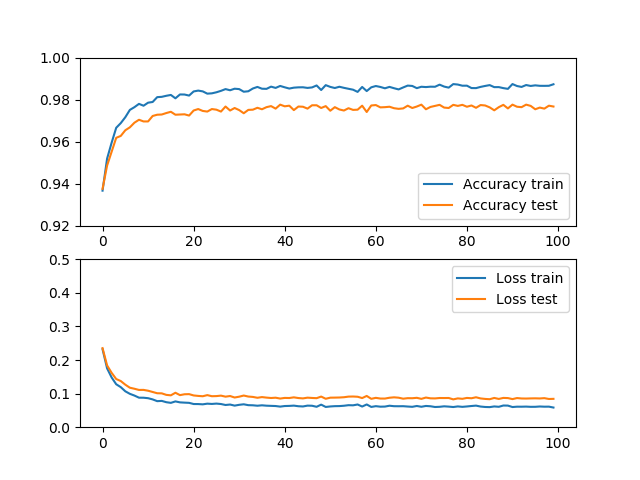

(0.9874, 0.9776)

In [88]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1,alpha=0.2)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


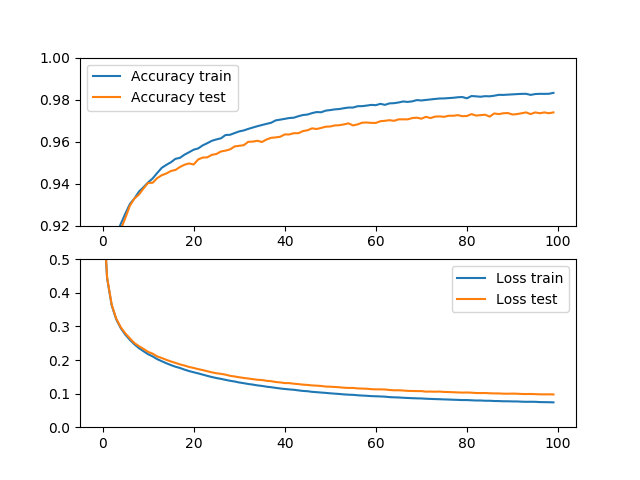

(0.9832, 0.9739)

In [89]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,max_iter=1,alpha=0.2,learning_rate_init=0.0001)
loss_train=[]
loss_test=[]
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)

<IPython.core.display.Javascript object>


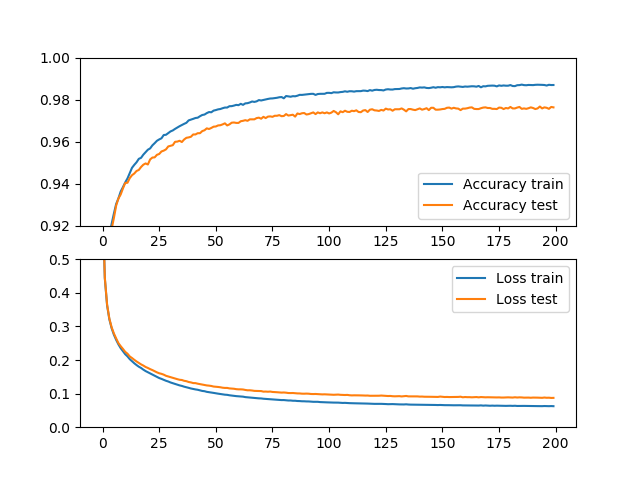

(0.9871333333333333, 0.9767)

In [90]:
for i in range(100):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


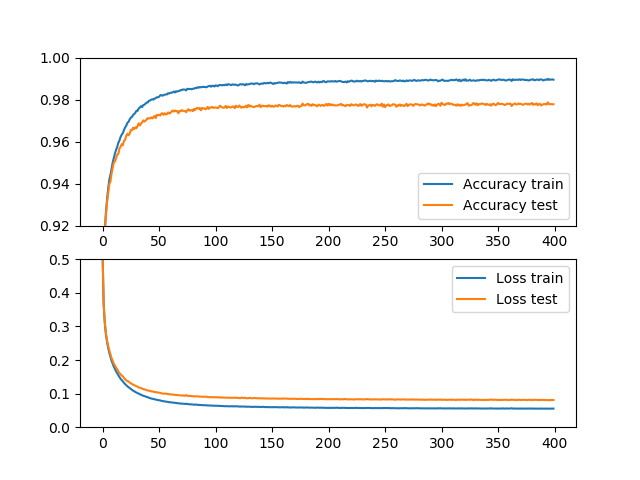

(0.9898833333333333, 0.9787)

In [13]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,hidden_layer_sizes=[200],max_iter=1,alpha=0.2,learning_rate_init=0.0001)
loss_train=[]
loss_test=[]
for i in range(400):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


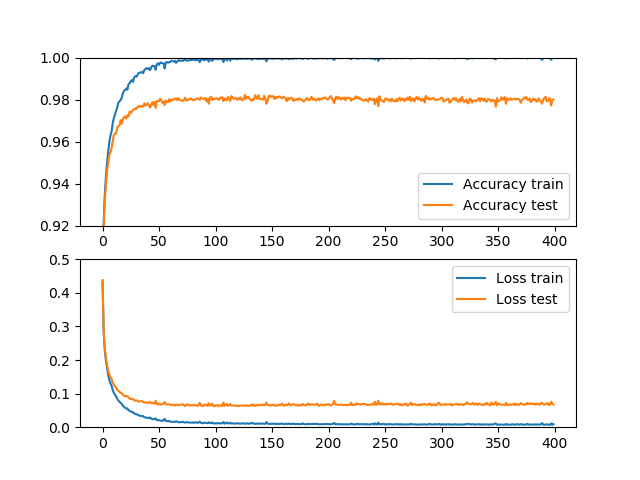

(0.9999833333333333, 0.9822)

In [14]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,hidden_layer_sizes=[200,100,60,30],max_iter=1,alpha=0.2,learning_rate_init=0.0001)
loss_train=[]
loss_test=[]
for i in range(400):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


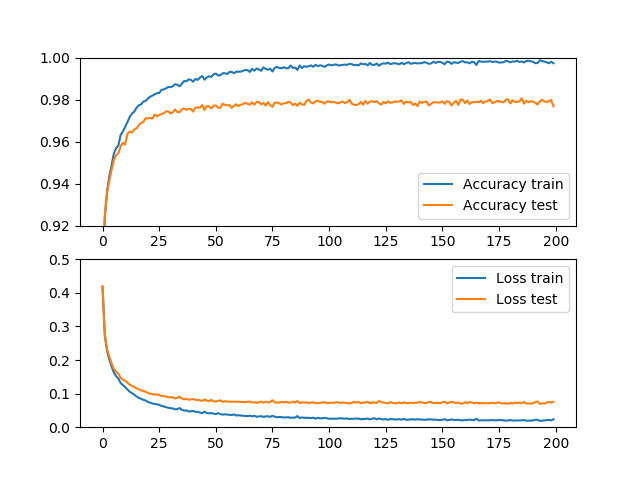

(0.9987166666666667, 0.9806)

In [15]:
accuracy_train=[]
accuracy_test=[]
nn=MLPClassifier(warm_start=True,hidden_layer_sizes=[200,100,60,30],max_iter=1,alpha=0.4,learning_rate_init=0.0001)
loss_train=[]
loss_test=[]
for i in range(200):
    nn.fit(X_train,y_train)
    y_pred_train=nn.predict(X_train)
    y_pred_test=nn.predict(X_test)
    y_proba_train=nn.predict_proba(X_train)
    y_proba_test=nn.predict_proba(X_test)
    loss_train.append(log_loss(y_train.values,y_proba_train))
    loss_test.append(log_loss(y_test.values,y_proba_test))
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.figure()
plt.subplot(211)
plt.plot(accuracy_train,label='Accuracy train')
plt.plot(accuracy_test,label='Accuracy test')
plt.ylim([0.92,1])
plt.legend()
plt.subplot(212)
plt.plot(loss_train,label='Loss train')
plt.plot(loss_test,label='Loss test')
plt.ylim([0,0.5])
plt.legend()
max(accuracy_train),max(accuracy_test)